In [ ]:
pip install imbalanced-learn


In [ ]:
import pandas as pd
data = pd.read_csv('/content/emotions.csv')
data.head()

X = data.iloc[:, :-1].values
y = data['label'].values

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [ ]:
import pandas as pd

original_class_distribution = pd.Series(y_train).value_counts()
print("Original class distribution:")
print(original_class_distribution)


Original class distribution:
1    501
2    499
0    492
Name: count, dtype: int64


In [ ]:
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input



In [ ]:




a
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


from collections import Counter
print("Resampled class distribution:")
print(Counter(y_train_resampled))


Resampled class distribution:
Counter({0: 501, 1: 501, 2: 501})


In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=2)


X_train_lda = lda.fit_transform(X_train_resampled_scaled, y_train_resampled)


In [ ]:
import numpy as np


noise_factor = 0.1
X_train_augmented = X_train_lda + noise_factor * np.random.normal(size=X_train_lda.shape)


X_train_combined = np.vstack((X_train_lda, X_train_augmented))
y_train_combined = np.hstack((y_train_resampled, y_train_resampled))


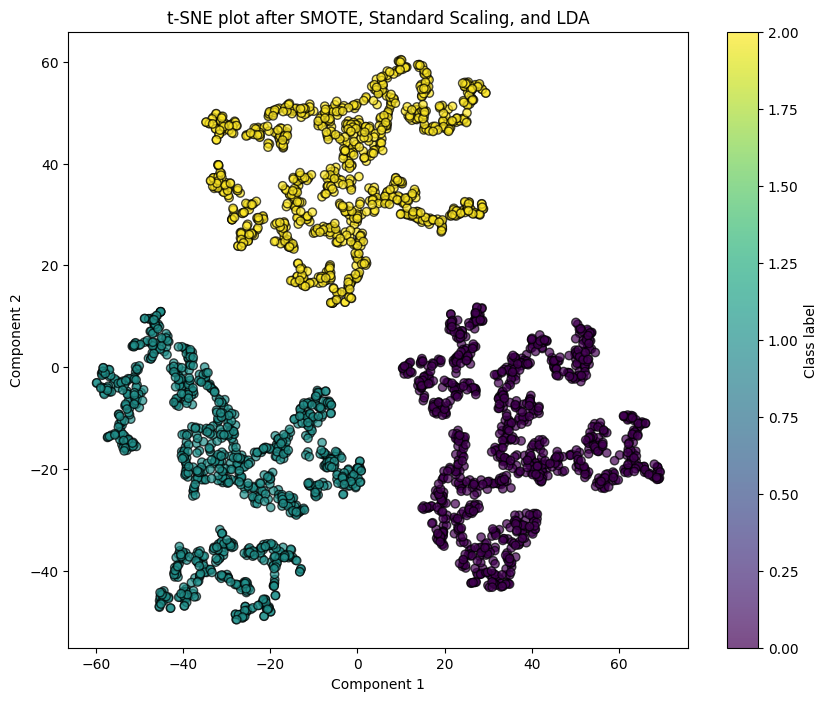

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2, random_state=42)


X_tsne = tsne.fit_transform(X_train_combined)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train_combined, cmap='viridis', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label='Class label')
plt.title('t-SNE plot after SMOTE, Standard Scaling, and LDA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


In [ ]:

# Split X_train_lda and y_train_resampled into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train_combined, y_train_combined, test_size=0.2,stratify=y_train_combined, random_state=42)

In [ ]:
import numpy as np


unique_classes_train, counts_train = np.unique(y_train, return_counts=True)
print("Training set class distribution:", dict(zip(unique_classes_train, counts_train)))

unique_classes_test, counts_test = np.unique(y_test, return_counts=True)
print("Test set class distribution:", dict(zip(unique_classes_test, counts_test)))


Training set class distribution: {0: 802, 1: 801, 2: 801}
Test set class distribution: {0: 200, 1: 201, 2: 201}


In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (2404, 2)
Shape of X_test: (602, 2)
Shape of y_train: (2404,)
Shape of y_test: (602,)


In [ ]:

num_classes = len(np.unique(y_encoded))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
lda
input_dim = X_train_combined.shape[1]

l
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.05)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.05)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

l
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=2,callbacks=[early_stopping])


loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")



from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)


print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))


print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


61/61 - 2s - 26ms/step - accuracy: 0.8716 - loss: 4.9969 - val_accuracy: 1.0000 - val_loss: 3.5611
Epoch 2/20
61/61 - 0s - 7ms/step - accuracy: 0.9870 - loss: 3.1546 - val_accuracy: 1.0000 - val_loss: 2.6726
Epoch 3/20
61/61 - 0s - 5ms/step - accuracy: 0.9927 - loss: 2.3538 - val_accuracy: 1.0000 - val_loss: 1.9841
Epoch 4/20
61/61 - 0s - 5ms/step - accuracy: 0.9948 - loss: 1.7439 - val_accuracy: 1.0000 - val_loss: 1.4738
Epoch 5/20
61/61 - 0s - 4ms/step - accuracy: 0.9964 - loss: 1.2960 - val_accuracy: 1.0000 - val_loss: 1.1002
Epoch 6/20
61/61 - 0s - 2ms/step - accuracy: 0.9958 - loss: 0.9685 - val_accuracy: 1.0000 - val_loss: 0.8282
Epoch 7/20
61/61 - 0s - 2ms/step - accuracy: 0.9953 - loss: 0.7380 - val_accuracy: 1.0000 - val_loss: 0.6302
Epoch 8/20
61/61 - 0s - 3ms/step - accuracy: 1.0000 - loss: 0.5588 - val_accuracy: 1.0000 - val_loss: 0.4819
Epoch 9/20
61/61 - 0s - 2ms/step - accuracy: 0.9974 - loss: 0.4331 - val_accuracy: 1.0000 - val_loss: 0.3730
Epoch 10/20
61/61 - 0s - 3ms/

In [ ]:

y_pred_classes = np.argmax(y_pred, axis=1)
unique_pred_classes = np.unique(y_pred_classes)
print("Unique predicted classes:", unique_pred_classes)


Unique predicted classes: [0 1 2]


In [ ]:

print("Shape of y_pred:", y_pred.shape)
print("Shape of y_test:", y_test.shape)


Shape of y_pred: (602, 3)
Shape of y_test: (602, 3)


In [ ]:
print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of y_train_combined:", y_train_combined.shape)


Shape of X_train_combined: (3006, 2)
Shape of y_train_combined: (3006,)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def create_model():
    # Define your model architecture here
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.05)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.05)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

for train_index, test_index in kf.split(X_train_combined):
    X_train_fold, X_test_fold = X_train_combined[train_index], X_train_combined[test_index]
    y_train_fold, y_test_fold = y_train_combined[train_index], y_train_combined[test_index]

    # One-hot encode the labels
    y_train_fold_one_hot = to_categorical(y_train_fold, num_classes=num_classes)
    y_test_fold_one_hot = to_categorical(y_test_fold, num_classes=num_classes)

    model = create_model()

    # Fit the model on this fold's training data
    model.fit(X_train_fold, y_train_fold_one_hot, epochs=20, validation_split=0.2, verbose=0)

    # Evaluate on this fold's test data
    y_pred_fold = model.predict(X_test_fold)
    y_pred_classes_fold = np.argmax(y_pred_fold, axis=1)
    y_test_classes_fold = np.argmax(y_test_fold_one_hot, axis=1)

    fold_accuracy = accuracy_score(y_test_classes_fold, y_pred_classes_fold)
    fold_accuracies.append(fold_accuracy)

print("Cross-validation accuracies:", fold_accuracies)
print("Average cross-validation accuracy:", np.mean(fold_accuracies))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Cross-validation accuracies: [1.0, 1.0, 1.0, 1.0, 1.0]
Average cross-validation accuracy: 1.0


In [ ]:
unique_classes_combined, counts_combined = np.unique(y_train_combined, return_counts=True)
print("Class distribution in combined dataset:", dict(zip(unique_classes_combined, counts_combined)))


Class distribution in combined dataset: {0: 1002, 1: 1002, 2: 1002}


In [ ]:

y_train_resampled = to_categorical(y_train, num_classes=num_classes) # Removed the erroneous y_train_resampled from this line
y_test = to_categorical(y_test, num_classes=num_classes)

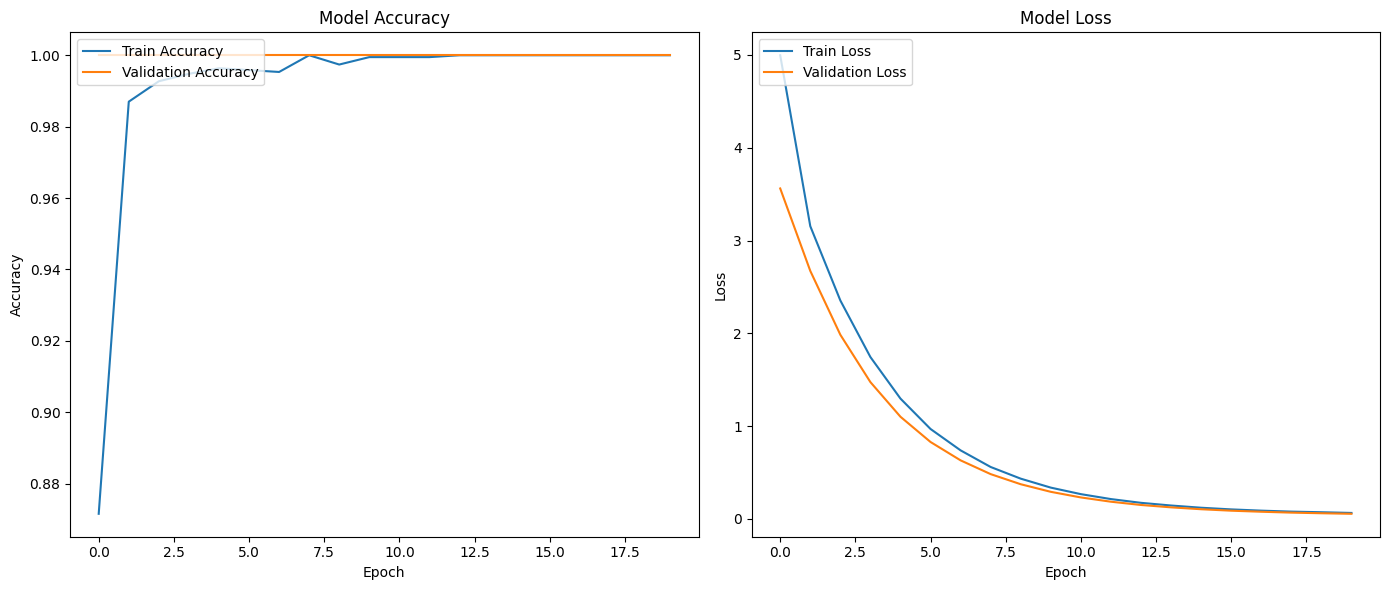

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):

    plt.figure(figsize=(14, 6))


    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)


In [ ]:
import numpy as np

y_test_classes = np.argmax(y_test, axis=1)
y_train_classes = np.argmax(y_train, axis=1)

print("Unique classes in y_test_classes:", np.unique(y_test_classes))
print("Unique classes in y_train_classes:", np.unique(y_train_classes))


Unique classes in y_test_classes: [0 1 2]
Unique classes in y_train_classes: [0 1 2]


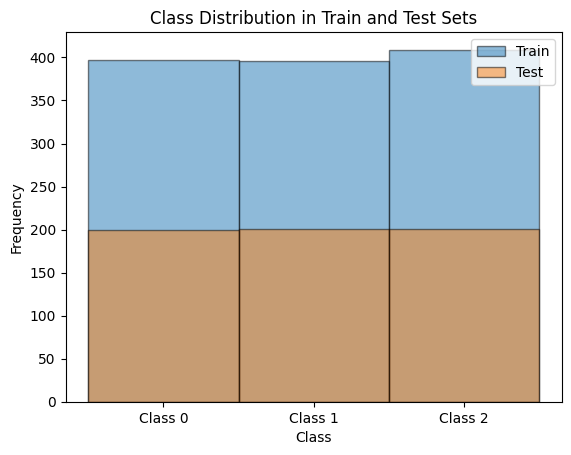

In [ ]:
import matplotlib.pyplot as plt

num_classes = 3


plt.hist(y_train_classes, bins=np.arange(num_classes + 1) - 0.5, alpha=0.5, label='Train', edgecolor='black')
plt.hist(y_test_classes, bins=np.arange(num_classes + 1) - 0.5, alpha=0.5, label='Test', edgecolor='black')
plt.legend(loc='upper right')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in Train and Test Sets')
plt.xticks(range(num_classes), [f'Class {i}' for i in range(num_classes)])
plt.show()


In [ ]:
print("Shape of y_train_classes:", y_train_classes.shape)
print("Shape of y_test_classes:", y_test_classes.shape)


Shape of y_train_classes: (1202,)
Shape of y_test_classes: (301, 3, 3)


In [ ]:
print("Shape of y_encoded:", y_encoded.shape)


Shape of y_encoded: (2132,)


In [ ]:
import numpy as np


unique_classes, counts = np.unique(y_encoded, return_counts=True)
print("Class distribution in the original dataset:", dict(zip(unique_classes, counts)))


Class distribution in the original dataset: {0: 708, 1: 716, 2: 708}


In [ ]:

print("Training set class distribution:", dict(zip(*np.unique(y_train_combined, return_counts=True))))
print("Test set class distribution:", dict(zip(*np.unique(y_test, return_counts=True))))


Training set class distribution: {0: 1002, 1: 1002, 2: 1002}
Test set class distribution: {0.0: 5418, 1.0: 2709}


In [ ]:
import numpy as np


y_test_classes = np.argmax(np.reshape(y_test_classes, (301, -1)), axis=1)

print("Shape of y_test_classes after reshaping:", y_test_classes.shape)


Shape of y_test_classes after reshaping: (301,)


In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_per_fold = []
loss_per_fold = []

y_categorical = to_categorical(y_train_resampled, num_classes=num_classes)

fold_no = 1
for train_index, val_index in kf.split(X_train_lda):
    print(f'Fold {fold_no}')

    X_train_fold, X_val_fold = X_train_lda[train_index], X_train_lda[val_index]
    y_train_fold, y_val_fold = y_categorical[train_index], y_categorical[val_index]

    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.05)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.05)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))


    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    history = model.fit(X_train_fold, y_train_fold,
                        epochs=20, batch_size=32,
                        validation_data=(X_val_fold, y_val_fold),
                        verbose=0)


    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}')


    loss_per_fold.append(scores[0])
    accuracy_per_fold.append(scores[1])

    fold_no += 1

print(f'Average loss: {np.mean(loss_per_fold)}')
print(f'Average accuracy: {np.mean(accuracy_per_fold)}')


Fold 1


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Score for fold 1: loss of 0.1547335535287857; compile_metrics of 1.0
Fold 2
Score for fold 2: loss of 0.17188532650470734; compile_metrics of 1.0
Fold 3
Score for fold 3: loss of 0.2241974174976349; compile_metrics of 1.0
Fold 4
Score for fold 4: loss of 0.21271541714668274; compile_metrics of 1.0
Fold 5
Score for fold 5: loss of 0.1797170788049698; compile_metrics of 1.0
Average loss: 0.1886497586965561
Average accuracy: 1.0


In [ ]:


smote = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

a
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = undersample.fit_resample(X_resampled, y_resampled)




In [ ]:

resampled_class_distribution = pd.Series(y_resampled).value_counts()
print("Resampled class distribution:")
print(resampled_class_distribution)


Resampled class distribution:
0    572
1    572
2    572
Name: count, dtype: int64


In [ ]:

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_resampled, y_resampled)
X_test_lda = lda.transform(X_test)

print("Transformed X_train shape:", X_train_lda.shape)
print("Transformed X_test shape:", X_test_lda.shape)

Transformed X_train shape: (1716, 2)
Transformed X_test shape: (427, 2)


In [ ]:
import pandas as pd

original_class_distribution = pd.Series(y_train).value_counts()
print("Original class distribution:")
print(original_class_distribution)


Original class distribution:
2    572
1    568
0    565
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical


num_classes = len(np.unique(y_encoded))


y_train_categorical = to_categorical(y_resampled, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)


model = Sequential()
model.add(Input(shape=(X_train_lda.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

l
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,835 (34.51 KB)

 Trainable params: 8,835 (34.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

history = model.fit(X_train_lda,
                    y_train_categorical,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=2)


Epoch 1/20
43/43 - 2s - 37ms/step - accuracy: 0.8251 - loss: 0.8493 - val_accuracy: 1.0000 - val_loss: 2.1129e-04
Epoch 2/20
43/43 - 0s - 8ms/step - accuracy: 0.9883 - loss: 0.0273 - val_accuracy: 1.0000 - val_loss: 2.7200e-05
Epoch 3/20
43/43 - 0s - 3ms/step - accuracy: 0.9905 - loss: 0.0259 - val_accuracy: 1.0000 - val_loss: 5.2379e-06
Epoch 4/20
43/43 - 0s - 3ms/step - accuracy: 0.9964 - loss: 0.0109 - val_accuracy: 1.0000 - val_loss: 1.8626e-06
Epoch 5/20
43/43 - 0s - 3ms/step - accuracy: 0.9934 - loss: 0.0174 - val_accuracy: 1.0000 - val_loss: 1.0043e-06
Epoch 6/20
43/43 - 0s - 3ms/step - accuracy: 0.9964 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 5.2639e-07
Epoch 7/20
43/43 - 0s - 3ms/step - accuracy: 0.9971 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 3.9921e-07
Epoch 8/20
43/43 - 0s - 3ms/step - accuracy: 0.9978 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 2.6372e-07
Epoch 9/20
43/43 - 0s - 3ms/step - accuracy: 0.9985 - loss: 0.0034 - val_accuracy: 1.0000 - val

In [ ]:

loss, accuracy = model.evaluate(X_test_lda, y_test_categorical, verbose=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


14/14 - 0s - 3ms/step - accuracy: 0.7986 - loss: 14.3691
Test Loss: 14.369138717651367
Test Accuracy: 0.7985948324203491


In [ ]:
from tensorflow.keras.optimizers import Adam


optimizer = Adam(learning_rate=0.0005)


model = Sequential()
model.add(Input(shape=(X_train_lda.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(X_train_lda,
                    y_train_categorical,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=2)


Epoch 1/20
43/43 - 1s - 33ms/step - accuracy: 0.7522 - loss: 1.3264 - val_accuracy: 1.0000 - val_loss: 0.0228
Epoch 2/20
43/43 - 0s - 3ms/step - accuracy: 0.9490 - loss: 0.1745 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 3/20
43/43 - 0s - 3ms/step - accuracy: 0.9665 - loss: 0.1022 - val_accuracy: 1.0000 - val_loss: 3.3225e-04
Epoch 4/20
43/43 - 0s - 3ms/step - accuracy: 0.9854 - loss: 0.0387 - val_accuracy: 1.0000 - val_loss: 1.1238e-04
Epoch 5/20
43/43 - 0s - 3ms/step - accuracy: 0.9876 - loss: 0.0324 - val_accuracy: 1.0000 - val_loss: 3.5631e-05
Epoch 6/20
43/43 - 0s - 3ms/step - accuracy: 0.9934 - loss: 0.0250 - val_accuracy: 1.0000 - val_loss: 2.5712e-05
Epoch 7/20
43/43 - 0s - 3ms/step - accuracy: 0.9913 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 1.5196e-05
Epoch 8/20
43/43 - 0s - 3ms/step - accuracy: 0.9949 - loss: 0.0165 - val_accuracy: 1.0000 - val_loss: 9.4337e-06
Epoch 9/20
43/43 - 0s - 3ms/step - accuracy: 0.9934 - loss: 0.0190 - val_accuracy: 1.0000 - val_loss: 6

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test_lda)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)


print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.86      0.77      0.81       143
     NEUTRAL       0.75      0.93      0.83       148
    POSITIVE       0.77      0.66      0.71       136

    accuracy                           0.79       427
   macro avg       0.79      0.79      0.78       427
weighted avg       0.79      0.79      0.79       427

Confusion Matrix:
[[110  15  18]
 [  2 137   9]
 [ 16  30  90]]


In [ ]:

loss, accuracy = model.evaluate(X_test_lda, y_test_categorical, verbose=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


14/14 - 0s - 3ms/step - accuracy: 0.7892 - loss: 13.4888
Test Loss: 13.488842964172363
Test Accuracy: 0.7892271876335144


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

def create_model(learning_rate=0.001, dropout_rate=0.5, optimizer='adam'):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)


learning_rates = [0.001, 0.01]
dropout_rates = [0.3, 0.5]
optimizers = ['adam', 'sgd']

best_score = 0
best_params = {}

for lr in learning_rates:
    for dr in dropout_rates:
        for opt in optimizers:
            model = create_model(learning_rate=lr, dropout_rate=dr, optimizer=opt)
            history = model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.2, verbose=2)
            score = model.evaluate(X_test, y_test_cat, verbose=0)[1]  # Get accuracy

            if score > best_score:
                best_score = score
                best_params = {'learning_rate': lr, 'dropout_rate': dr, 'optimizer': opt}

print("Best Score:", best_score)
print("Best Parameters:", best_params)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
43/43 - 2s - 39ms/step - accuracy: 0.5469 - loss: 74524594798592.0000 - val_accuracy: 0.6100 - val_loss: 7956935475200.0000
Epoch 2/20
43/43 - 0s - 10ms/step - accuracy: 0.5579 - loss: 139856323805184.0000 - val_accuracy: 0.5279 - val_loss: 33929186770944.0000
Epoch 3/20
43/43 - 1s - 15ms/step - accuracy: 0.5411 - loss: 16658699649024.0000 - val_accuracy: 0.5982 - val_loss: 3472281829376.0000
Epoch 4/20
43/43 - 1s - 15ms/step - accuracy: 0.5674 - loss: 24679320387584.0000 - val_accuracy: 0.6745 - val_loss: 3762695962624.0000
Epoch 5/20
43/43 - 1s - 13ms/step - accuracy: 0.5946 - loss: 58329585942528.0000 - val_accuracy: 0.6569 - val_loss: 5371267645440.0000
Epoch 6/20
43/43 - 0s - 8ms/step - accuracy: 0.5616 - loss: 50012394356736.0000 - val_accuracy: 0.5279 - val_loss: 6451657965568.0000
Epoch 7/20
43/43 - 0s - 7ms/step - accuracy: 0.5301 - loss: 118513800839168.0000 - val_accuracy: 0.5308 - val_loss: 54988814417920.0000
Epoch 8/20
43/43 - 0s - 7ms/step - accuracy: 0.5609 -

In [ ]:
import pandas as pd

original_class_distribution = pd.Series(y_train).value_counts()
print("Original class distribution:")
print(original_class_distribution)


Original class distribution:
2    572
1    568
0    565
Name: count, dtype: int64
